In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

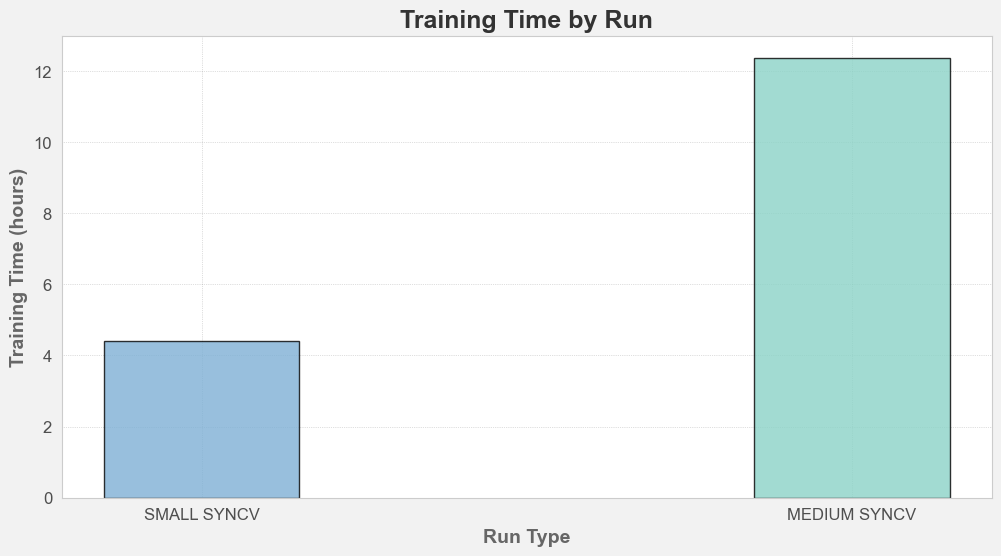

In [35]:
import os
import pandas as pd

run_paths = [
   #"../mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    #"../mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # MEDIUM SYN
    
    #"../mlruns/117967985259146291/6111072cb4fc420099d4cbbfff0e0a28/metrics/", # SMALL SYNFLEUR 1.0h
    
    
    "../mlruns/117967985259146291/1d6aa256120f478aa454490c7bc9e1d4/metrics/", # SMALL SYNCV
    "../mlruns/117967985259146291/b5fbbe1ad2f64e8d866592754a2f181b/metrics/", # MEDIUM SYNCV    

]

run_map = {
    "0320dd8c949d4fed92b098c9bc2ea4b4": "SMALL SYN",
    "fe82d5ea6ef14bfcaa382bac08eca665": "MEDIUM SYN",
    "6111072cb4fc420099d4cbbfff0e0a28": "SMALL SYNFLEUR 1.0h",
    "1d6aa256120f478aa454490c7bc9e1d4": "SMALL SYNCV",
    "b5fbbe1ad2f64e8d866592754a2f181b": "MEDIUM SYNCV"
}

training_times = [] # List to store training times

# Extract training times from files
for run_path in run_paths:
    
    file_path = os.path.join(run_path, "train_runtime")
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()  # Split each line into parts
            if len(parts) > 1:
                run_id = run_path.split('/')[-3] # Check if there are enough parts
                training_time = float(parts[1])  # Convert the middle part to float (time)
                training_times.append({"run": run_map[run_id], "training_time": training_time / 3600})  # Append to the list



# Set Seaborn style with a white background and grid
sns.set_style("whitegrid")

# Example data from your script

# Prepare data for plotting
runs = [d['run'] for d in training_times]
times = [d['training_time'] for d in training_times]

# Create the bar chart with aesthetic enhancements
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background
bars = plt.bar(runs, times, color=["#7eb0d5", "#8bd3c7"], alpha=0.8, edgecolor="black", width=0.3)



plt.title('Training Time by Run', fontsize=18, fontweight='bold', color="#333333")
plt.xlabel('Run Type', fontsize=14, fontweight='bold', color="#666666")
plt.ylabel('Training Time (hours)', fontsize=14, fontweight='bold', color="#666666")

plt.xticks(fontsize=12, fontweight='normal', color="#4f4f4f")
plt.yticks(fontsize=12, fontweight='normal', color="#4f4f4f")

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.5)
plt.show()

    